#### Dependencies

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import Dropout

#### Pre-Processing

In [19]:
df = pd.read_csv('../Dataset/Delhi.csv', skiprows = 15)
df.head()

,YEAR,MO,DY,T2M_MAX,T2M,T2M_MIN,TS,RH2M,PS,T2MDEW
0,1981,1,30,23.08,15.05,8.87,15.48,64.31,98.55,7.40
1,1981,1,31,23.49,15.17,8.39,15.79,60.69,98.72,6.28
2,1981,2,1,21.23,12.69,6.84,13.15,56.12,99.14,2.97
3,1981,2,2,20.37,11.94,4.03,11.75,49.12,99.20,0.38
4,1981,2,3,23.22,14.04,7.36,13.90,45.25,99.06,1.07


In [20]:
df['YEAR'] = df.YEAR.astype(str)
df['MO'] = df.MO.astype(str)
df['DY'] = df.DY.astype(str)

df['dateTime'] = df['YEAR'].str.cat(df['MO'])
df['dateTime'] = df['dateTime'].str.cat(df['DY'])

df.drop(['YEAR', 'MO', 'DY'], axis=1, inplace=True)

In [21]:
df['dateTime'] = pd.to_datetime(df['dateTime'], format = '%Y%m%d')
df.set_index('dateTime', inplace = True)
df.head()

,T2M_MAX,T2M,T2M_MIN,TS,RH2M,PS,T2MDEW
dateTime,,,,,,,
1981-01-30,23.08,15.05,8.87,15.48,64.31,98.55,7.40
1981-01-31,23.49,15.17,8.39,15.79,60.69,98.72,6.28
1981-02-01,21.23,12.69,6.84,13.15,56.12,99.14,2.97
1981-02-02,20.37,11.94,4.03,11.75,49.12,99.20,0.38
1981-02-03,23.22,14.04,7.36,13.90,45.25,99.06,1.07


In [22]:
df.rename(columns= {'T2M_MAX':'tempMax', 'T2M':'temp', 'T2M_MIN':'tempMin', 'TS':'earthSkin','RH2M':'relativeHumidity','PS':'pressure','T2MDEW':'dew'}, inplace = True)
df.head()

,tempMax,temp,tempMin,earthSkin,relativeHumidity,pressure,dew
dateTime,,,,,,,
1981-01-30,23.08,15.05,8.87,15.48,64.31,98.55,7.40
1981-01-31,23.49,15.17,8.39,15.79,60.69,98.72,6.28
1981-02-01,21.23,12.69,6.84,13.15,56.12,99.14,2.97
1981-02-02,20.37,11.94,4.03,11.75,49.12,99.20,0.38
1981-02-03,23.22,14.04,7.36,13.90,45.25,99.06,1.07


In [23]:
X = df.drop('tempMax', axis = 1)

X.head()
X.shape

(15390, 6)

In [24]:
y = df['tempMax']
y


dateTime
1981-01-30    23.08
1981-01-31    23.49
1981-02-01    21.23
1981-02-02    20.37
1981-02-03    23.22
              ...  
2023-03-16    34.20
2023-03-17    31.19
2023-03-18    30.21
2023-03-19    28.87
2023-03-20    24.44
Name: tempMax, Length: 15390, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = False)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)

scaler2 = MinMaxScaler(feature_range = (0,1))
scaler2.fit(np.array(y_train).reshape(-1,1))

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


y_train_scaled = scaler2.transform(np.array(y_train).reshape(-1,1))
y_train_scaled = y_train_scaled.reshape(-1,1)
y_test_scaled = scaler2.transform(np.array(y_test).reshape(-1,1))
y_test_scaled = y_test_scaled.reshape(-1,1)

#### Architecture

In [27]:
model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
#Output layer
model.add(Dense(1, activation = 'linear'))

In [28]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               896       
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 25,729
Trainable params: 25,729
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(X_train_scaled, y_train_scaled, epochs = 120,validation_split=0.25,batch_size=32)

Epoch 1/120
271/271 [==============================] - 1s 2ms/step - loss: 0.0057 - mae: 0.0405 - val_loss: 5.8525e-04 - val_mae: 0.0188
Epoch 2/120
271/271 [==============================] - 1s 2ms/step - loss: 5.8137e-04 - mae: 0.0189 - val_loss: 3.6047e-04 - val_mae: 0.0149
Epoch 3/120
271/271 [==============================] - 1s 2ms/step - loss: 4.6005e-04 - mae: 0.0168 - val_loss: 4.7696e-04 - val_mae: 0.0174
Epoch 4/120
271/271 [==============================] - 1s 2ms/step - loss: 4.3784e-04 - mae: 0.0165 - val_loss: 3.4569e-04 - val_mae: 0.0145
Epoch 5/120
271/271 [==============================] - 1s 2ms/step - loss: 4.0382e-04 - mae: 0.0158 - val_loss: 3.3618e-04 - val_mae: 0.0143
Epoch 6/120
271/271 [==============================] - 1s 3ms/step - loss: 4.1466e-04 - mae: 0.0160 - val_loss: 3.3578e-04 - val_mae: 0.0144
Epoch 7/120
271/271 [==============================] - 1s 2ms/step - loss: 4.1312e-04 - mae: 0.0160 - val_loss: 3.5556e-04 - val_mae: 0.0151
Epoch 8/120
271/2

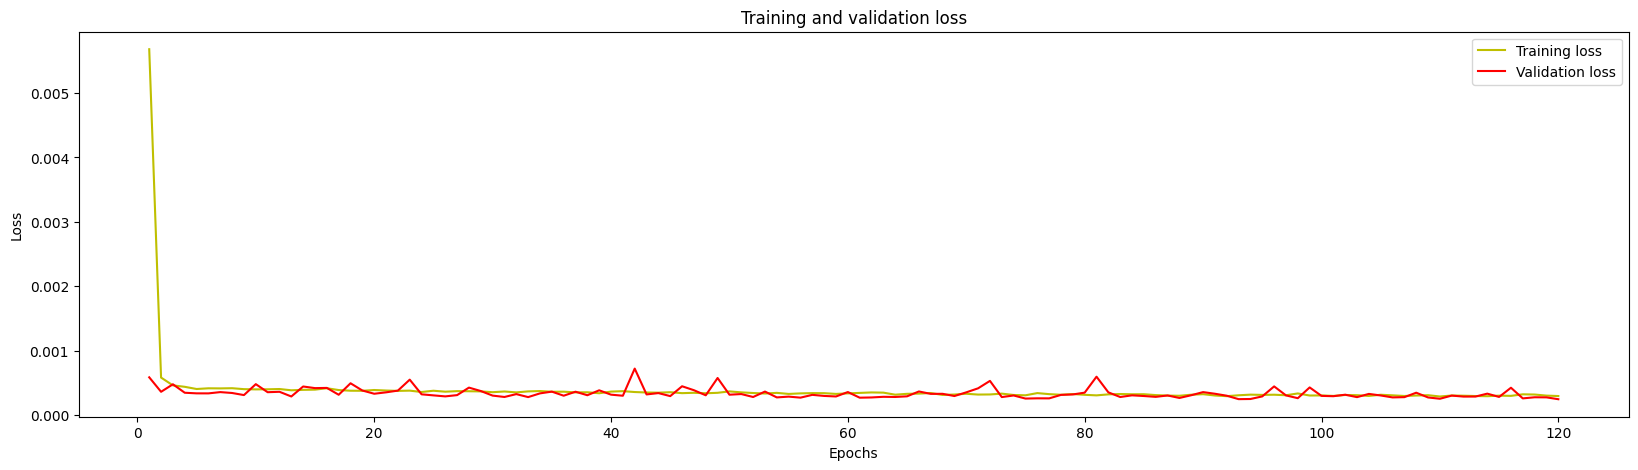

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Prediction

In [31]:
#Predict on test data
Y_pred = model.predict(X_test_scaled)
Y_pred = scaler2.inverse_transform(Y_pred)
print("Predicted values are: ", Y_pred)
print("Real values are: ", y_test)

121/121 [==============================] - 0s 2ms/step
Predicted values are:  [[31.078487]
 [30.311892]
 [30.454037]
 ...
 [30.27584 ]
 [30.073227]
 [25.469   ]]
Real values are:  dateTime
2012-09-06    30.90
2012-09-07    30.28
2012-09-08    30.65
2012-09-09    32.43
2012-09-10    32.33
              ...  
2023-03-16    34.20
2023-03-17    31.19
2023-03-18    30.21
2023-03-19    28.87
2023-03-20    24.44
Name: tempMax, Length: 3848, dtype: float64


In [32]:
T = range(Y_pred.shape[0])

Text(0.5, 0, 'Values')

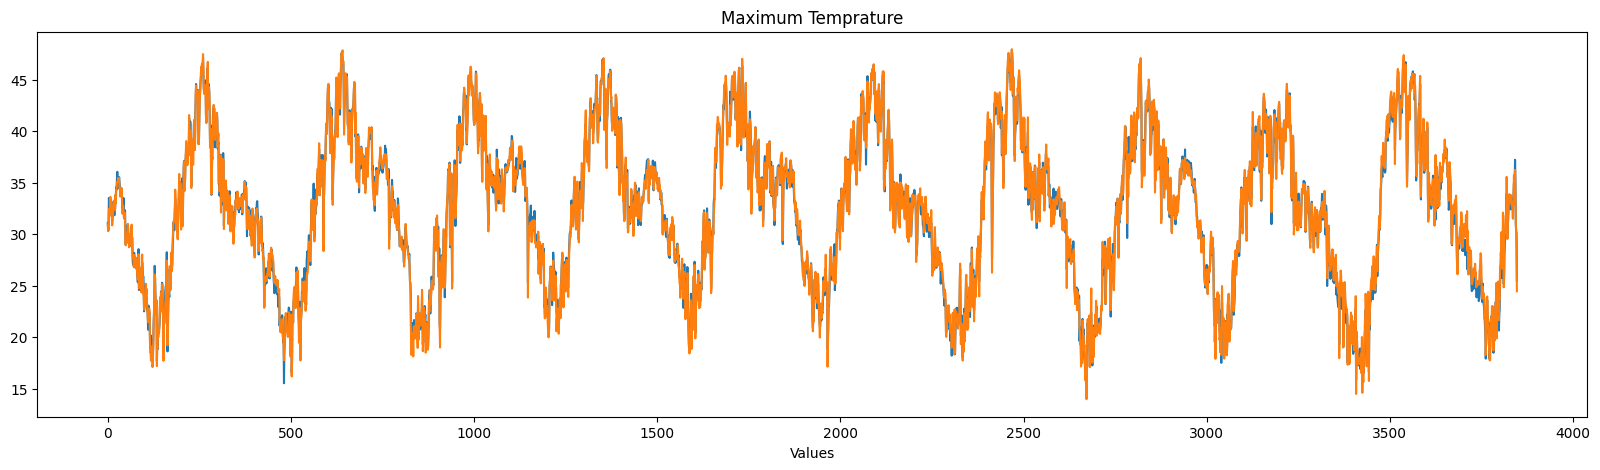

In [33]:
plt.plot(T, Y_pred[:])
plt.plot(T, y_test[:])
plt.rcParams["figure.figsize"] = (200,50)
plt.title('Maximum Temprature')
plt.xlabel('Values')

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Temp_mae = mean_absolute_error(Y_pred, y_test)
print("MAE:",Temp_mae)

print("MSE:", mean_squared_error(Y_pred, y_test))
print("RMSE:", sqrt(mean_squared_error(Y_pred, y_test)))

MAE: 0.49191288788452464
MSE: 0.4078392057362079
RMSE: 0.6386228979109722
